# Project1

## Step 1
Dependencies and Setup

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests

from scipy.stats import linregress

# from api_keys import geoapify_key

In [2]:
# Load the CSV file
df=pd.read_csv("./Resources/Kaggle/Student Loan Debt by School 2020-2021.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21370 entries, 0 to 21369
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   index                  21370 non-null  int64  
 1   OPE ID                 21370 non-null  int64  
 2   School                 21370 non-null  object 
 3   City                   16825 non-null  object 
 4   State                  20350 non-null  object 
 5   Zip Code               16825 non-null  float64
 6   School Type            21370 non-null  object 
 7   Loan Type              21370 non-null  object 
 8   Recipients             21370 non-null  int64  
 9   # of Loans Originated  21370 non-null  int64  
 10  $ of Loans Originated  21370 non-null  int64  
 11  # of Disbursements     21370 non-null  int64  
 12  $ of Disbursements     21370 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.1+ MB


In [3]:
# Change data type and rename columns
df['Zip Code'] = df['Zip Code'].fillna(-1).astype(int).astype(str).replace('-1', 'NaN')
df['Recipients'] = df['Recipients'].astype(int)
df['# of Loans Originated'] = df['# of Loans Originated'].astype(int)
df['# of Disbursements'] = df['# of Disbursements'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21370 entries, 0 to 21369
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   index                  21370 non-null  int64 
 1   OPE ID                 21370 non-null  int64 
 2   School                 21370 non-null  object
 3   City                   16825 non-null  object
 4   State                  20350 non-null  object
 5   Zip Code               21370 non-null  object
 6   School Type            21370 non-null  object
 7   Loan Type              21370 non-null  object
 8   Recipients             21370 non-null  int32 
 9   # of Loans Originated  21370 non-null  int32 
 10  $ of Loans Originated  21370 non-null  int64 
 11  # of Disbursements     21370 non-null  int32 
 12  $ of Disbursements     21370 non-null  int64 
dtypes: int32(3), int64(4), object(6)
memory usage: 1.9+ MB


In [4]:
df.head(10)

,index,OPE ID,School,City,State,Zip Code,School Type,Loan Type,Recipients,# of Loans Originated,$ of Loans Originated,# of Disbursements,$ of Disbursements
0,17167,1328,UNIVERSITY OF SOUTHERN CALIFORNIA,LOS ANGELES,CA,90089,Private-Nonprofit,Grad Plus,5613,5760,108725713,5760,108565375
1,8812,1509,NOVA SOUTHEASTERN UNIVERSITY-DAVIE,FORT LAUDERDALE,FL,33314,Private-Nonprofit,Unsubsidized - Graduate,8663,8707,106710999,8710,106710999
2,19883,22333,"ST. GEORGE'S UNIVERSITY, SCHOOL OF MEDICINE",NaN,NaN,NaN,Foreign-For-Profit,Grad Plus,3045,3183,153948017,3186,103155983
3,8619,1328,UNIVERSITY OF SOUTHERN CALIFORNIA,LOS ANGELES,CA,90089,Private-Nonprofit,Unsubsidized - Graduate,8662,8726,100481022,8728,100481022
4,18071,2785,NEW YORK UNIVERSITY,NEW YORK,NY,10012,Private-Nonprofit,Grad Plus,4200,4537,154068506,4537,84427896
5,10132,20530,LIBERTY UNIVERSITY,NaN,VA,NaN,Private-Nonprofit,Unsubsidized - Graduate,12390,12662,232387661,12662,82298123
6,17360,1509,NOVA SOUTHEASTERN UNIVERSITY-DAVIE,FORT LAUDERDALE,FL,33314,Private-Nonprofit,Grad Plus,4322,4511,109115098,4511,74111085
7,8586,1074,GRAND CANYON UNIVERSITY,PHOENIX,AZ,85017,Proprietary,Unsubsidized - Graduate,9635,9639,139108046,9876,73987720
8,9336,32673,CAPELLA UNIVERSITY,MINNEAPOLIS,MN,55402,Proprietary,Unsubsidized - Graduate,16211,21120,258601543,21164,73762493
9,4311,1081,ARIZONA STATE UNIVERSITY,TEMPE,AZ,85287,Public,Unsubsidized - Undergraduate,26078,26732,143877613,26732,73170602


In [5]:
df.describe()

,index,OPE ID,Recipients,# of Loans Originated,$ of Loans Originated,# of Disbursements,$ of Disbursements
count,21370.000000,21370.000000,21370.000000,21370.000000,2.137000e+04,21370.000000,2.137000e+04
mean,10684.500000,16201.447824,327.571221,336.351006,2.552457e+06,341.877679,1.278388e+06
std,6169.131962,15479.675287,1026.847813,1057.889512,8.464158e+06,1078.516745,4.298032e+06
min,0.000000,1002.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,5342.250000,2848.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
50%,10684.500000,8447.500000,10.000000,10.000000,5.841800e+04,10.000000,2.873850e+04
75%,16026.750000,30837.000000,188.750000,192.000000,1.430073e+06,197.000000,7.090422e+05
max,21369.000000,42933.000000,26663.000000,27261.000000,2.586015e+08,27261.000000,1.085654e+08


In [6]:
# drop total rows
df = df[~df['Loan Type'].str.contains('Total', case=False)]
df = df[~df['School Type'].str.contains('Foreign-Private', case=False)]
df = df[~df['School Type'].str.contains('Foreign-Public', case=False)]
df = df[~df['School Type'].str.contains('Foreign-For-Profit', case=False)]
df.drop(df[df['$ of Loans Originated'] == 0].index, inplace=True)
df.drop(df[df['# of Loans Originated'] == 0].index, inplace=True)
df

,index,OPE ID,School,City,State,Zip Code,School Type,Loan Type,Recipients,# of Loans Originated,$ of Loans Originated,# of Disbursements,$ of Disbursements
0,17167,1328,UNIVERSITY OF SOUTHERN CALIFORNIA,LOS ANGELES,CA,90089,Private-Nonprofit,Grad Plus,5613,5760,108725713,5760,108565375
1,8812,1509,NOVA SOUTHEASTERN UNIVERSITY-DAVIE,FORT LAUDERDALE,FL,33314,Private-Nonprofit,Unsubsidized - Graduate,8663,8707,106710999,8710,106710999
3,8619,1328,UNIVERSITY OF SOUTHERN CALIFORNIA,LOS ANGELES,CA,90089,Private-Nonprofit,Unsubsidized - Graduate,8662,8726,100481022,8728,100481022
4,18071,2785,NEW YORK UNIVERSITY,NEW YORK,NY,10012,Private-Nonprofit,Grad Plus,4200,4537,154068506,4537,84427896
5,10132,20530,LIBERTY UNIVERSITY,NaN,VA,NaN,Private-Nonprofit,Unsubsidized - Graduate,12390,12662,232387661,12662,82298123
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20190,18677,3694,SAINT MICHAEL'S COLLEGE,COLCHESTER,VT,5439,Private-Nonprofit,Grad Plus,3,3,22139,3,13825
20276,18672,3684,CHAMPLAIN COLLEGE,BURLINGTON,VT,5401,Private-Nonprofit,Grad Plus,3,3,25730,3,12865
20292,2811,8658,O'BRIENS AVEDA INSTITUTE,WILLISTON,VT,5495,Proprietary,Subsidized,3,3,8333,3,4166
20296,7085,8658,O'BRIENS AVEDA INSTITUTE,WILLISTON,VT,5495,Proprietary,Unsubsidized - Undergraduate,3,3,6419,3,3209


## Step 2
### Ask the questions

State, What is the breakdown of number of collages in each state? P

State, What is the breakdown of recipients of Student Loans by State (by quantity and by $)?P

State, What states have the most (public schools? Private schools?) recipients?P

State, What are the top 10 states with the most student loans?L

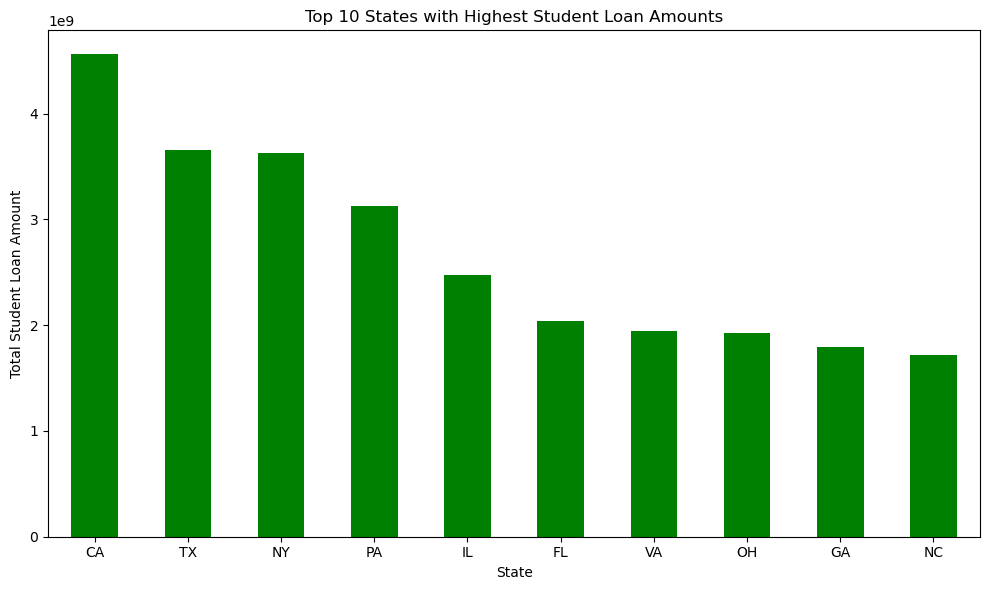

In [7]:
# Divide data into groups based on state, then sum the $ of loans originated in each state
state_loan_totals = df.groupby('State')['$ of Loans Originated'].sum()
# Sort the states by the total $ of loans originated in each state
top_10_states = state_loan_totals.sort_values(ascending=False).head(10)

# Plot the top 10 states with the highest student loan amounts
plt.figure(figsize=(10, 6))
top_10_states.plot(kind='bar', color='green')
plt.title('Top 10 States with Highest Student Loan Amounts')
plt.xlabel('State')
plt.ylabel('Total Student Loan Amount')
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()


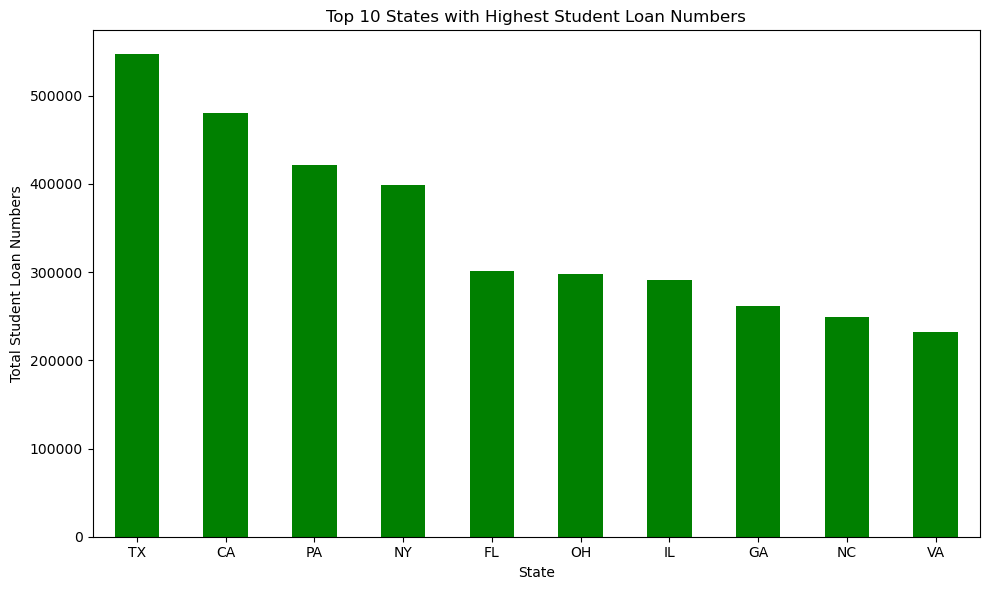

In [8]:
# Divide data into groups based on state, then sum the # of loans originated in each state
state_loan_totals_num = df.groupby('State')['# of Loans Originated'].sum()
# Sort the states by the total $ of loans originated in each state
top_10_states_num = state_loan_totals_num.sort_values(ascending=False).head(10)

# Plot the top 10 states with the highest student loan amounts
plt.figure(figsize=(10, 6))
top_10_states_num.plot(kind='bar', color='green')
plt.title('Top 10 States with Highest Student Loan Numbers')
plt.xlabel('State')
plt.ylabel('Total Student Loan Numbers')
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()


In [9]:
#top_10_states_df = df.merge(top_10_states, how='inner', left_on='State', right_index=True)
#top_10_states_df

In [10]:
#top_10_states_num = df.merge(top_10_states_num, how='inner', left_on='State', right_index=True)
#top_10_states_num

In [11]:
top_10_states_df = df[df['State'].isin(top_10_states.index)]
top_10_states_df

,index,OPE ID,School,City,State,Zip Code,School Type,Loan Type,Recipients,# of Loans Originated,$ of Loans Originated,# of Disbursements,$ of Disbursements
0,17167,1328,UNIVERSITY OF SOUTHERN CALIFORNIA,LOS ANGELES,CA,90089,Private-Nonprofit,Grad Plus,5613,5760,108725713,5760,108565375
1,8812,1509,NOVA SOUTHEASTERN UNIVERSITY-DAVIE,FORT LAUDERDALE,FL,33314,Private-Nonprofit,Unsubsidized - Graduate,8663,8707,106710999,8710,106710999
3,8619,1328,UNIVERSITY OF SOUTHERN CALIFORNIA,LOS ANGELES,CA,90089,Private-Nonprofit,Unsubsidized - Graduate,8662,8726,100481022,8728,100481022
4,18071,2785,NEW YORK UNIVERSITY,NEW YORK,NY,10012,Private-Nonprofit,Grad Plus,4200,4537,154068506,4537,84427896
5,10132,20530,LIBERTY UNIVERSITY,NaN,VA,NaN,Private-Nonprofit,Unsubsidized - Graduate,12390,12662,232387661,12662,82298123
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13964,16545,8189,CONTINENTAL SCHOOL OF BEAUTY CULTURE - BUFFALO,WEST SENECA,NY,14224,Proprietary,Parent Plus,1,1,220,1,220
13966,8534,23313,INTERACTIVE COLLEGE OF TECHNOLOGY,NaN,TX,NaN,Proprietary,Unsubsidized - Undergraduate,1,1,401,1,201
13968,4271,4666,AMERICAN COLLEGE FOR MEDICAL CAREERS,ORLANDO,FL,32809,Proprietary,Subsidized,1,1,375,1,188
13969,8528,41890,BARBER & BEAUTY INSTITUTE OF NEW YORK,HEMPSTEAD,NY,11550,Proprietary,Unsubsidized - Undergraduate,1,1,373,1,187


In [12]:
top_10_states_df_num = df[df['State'].isin(top_10_states_num.index)]
top_10_states_df_num

,index,OPE ID,School,City,State,Zip Code,School Type,Loan Type,Recipients,# of Loans Originated,$ of Loans Originated,# of Disbursements,$ of Disbursements
0,17167,1328,UNIVERSITY OF SOUTHERN CALIFORNIA,LOS ANGELES,CA,90089,Private-Nonprofit,Grad Plus,5613,5760,108725713,5760,108565375
1,8812,1509,NOVA SOUTHEASTERN UNIVERSITY-DAVIE,FORT LAUDERDALE,FL,33314,Private-Nonprofit,Unsubsidized - Graduate,8663,8707,106710999,8710,106710999
3,8619,1328,UNIVERSITY OF SOUTHERN CALIFORNIA,LOS ANGELES,CA,90089,Private-Nonprofit,Unsubsidized - Graduate,8662,8726,100481022,8728,100481022
4,18071,2785,NEW YORK UNIVERSITY,NEW YORK,NY,10012,Private-Nonprofit,Grad Plus,4200,4537,154068506,4537,84427896
5,10132,20530,LIBERTY UNIVERSITY,NaN,VA,NaN,Private-Nonprofit,Unsubsidized - Graduate,12390,12662,232387661,12662,82298123
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13964,16545,8189,CONTINENTAL SCHOOL OF BEAUTY CULTURE - BUFFALO,WEST SENECA,NY,14224,Proprietary,Parent Plus,1,1,220,1,220
13966,8534,23313,INTERACTIVE COLLEGE OF TECHNOLOGY,NaN,TX,NaN,Proprietary,Unsubsidized - Undergraduate,1,1,401,1,201
13968,4271,4666,AMERICAN COLLEGE FOR MEDICAL CAREERS,ORLANDO,FL,32809,Proprietary,Subsidized,1,1,375,1,188
13969,8528,41890,BARBER & BEAUTY INSTITUTE OF NEW YORK,HEMPSTEAD,NY,11550,Proprietary,Unsubsidized - Undergraduate,1,1,373,1,187


In [13]:
top_10_states

State
CA    4560513271
TX    3659070238
NY    3628169842
PA    3124201398
IL    2475197981
FL    2037438833
VA    1945669906
OH    1923909608
GA    1792658962
NC    1716090531
Name: $ of Loans Originated, dtype: int64

In [14]:
top_10_states_num

State
TX    546754
CA    479984
PA    421943
NY    398380
FL    301806
OH    297945
IL    291570
GA    261618
NC    249061
VA    232368
Name: # of Loans Originated, dtype: int32

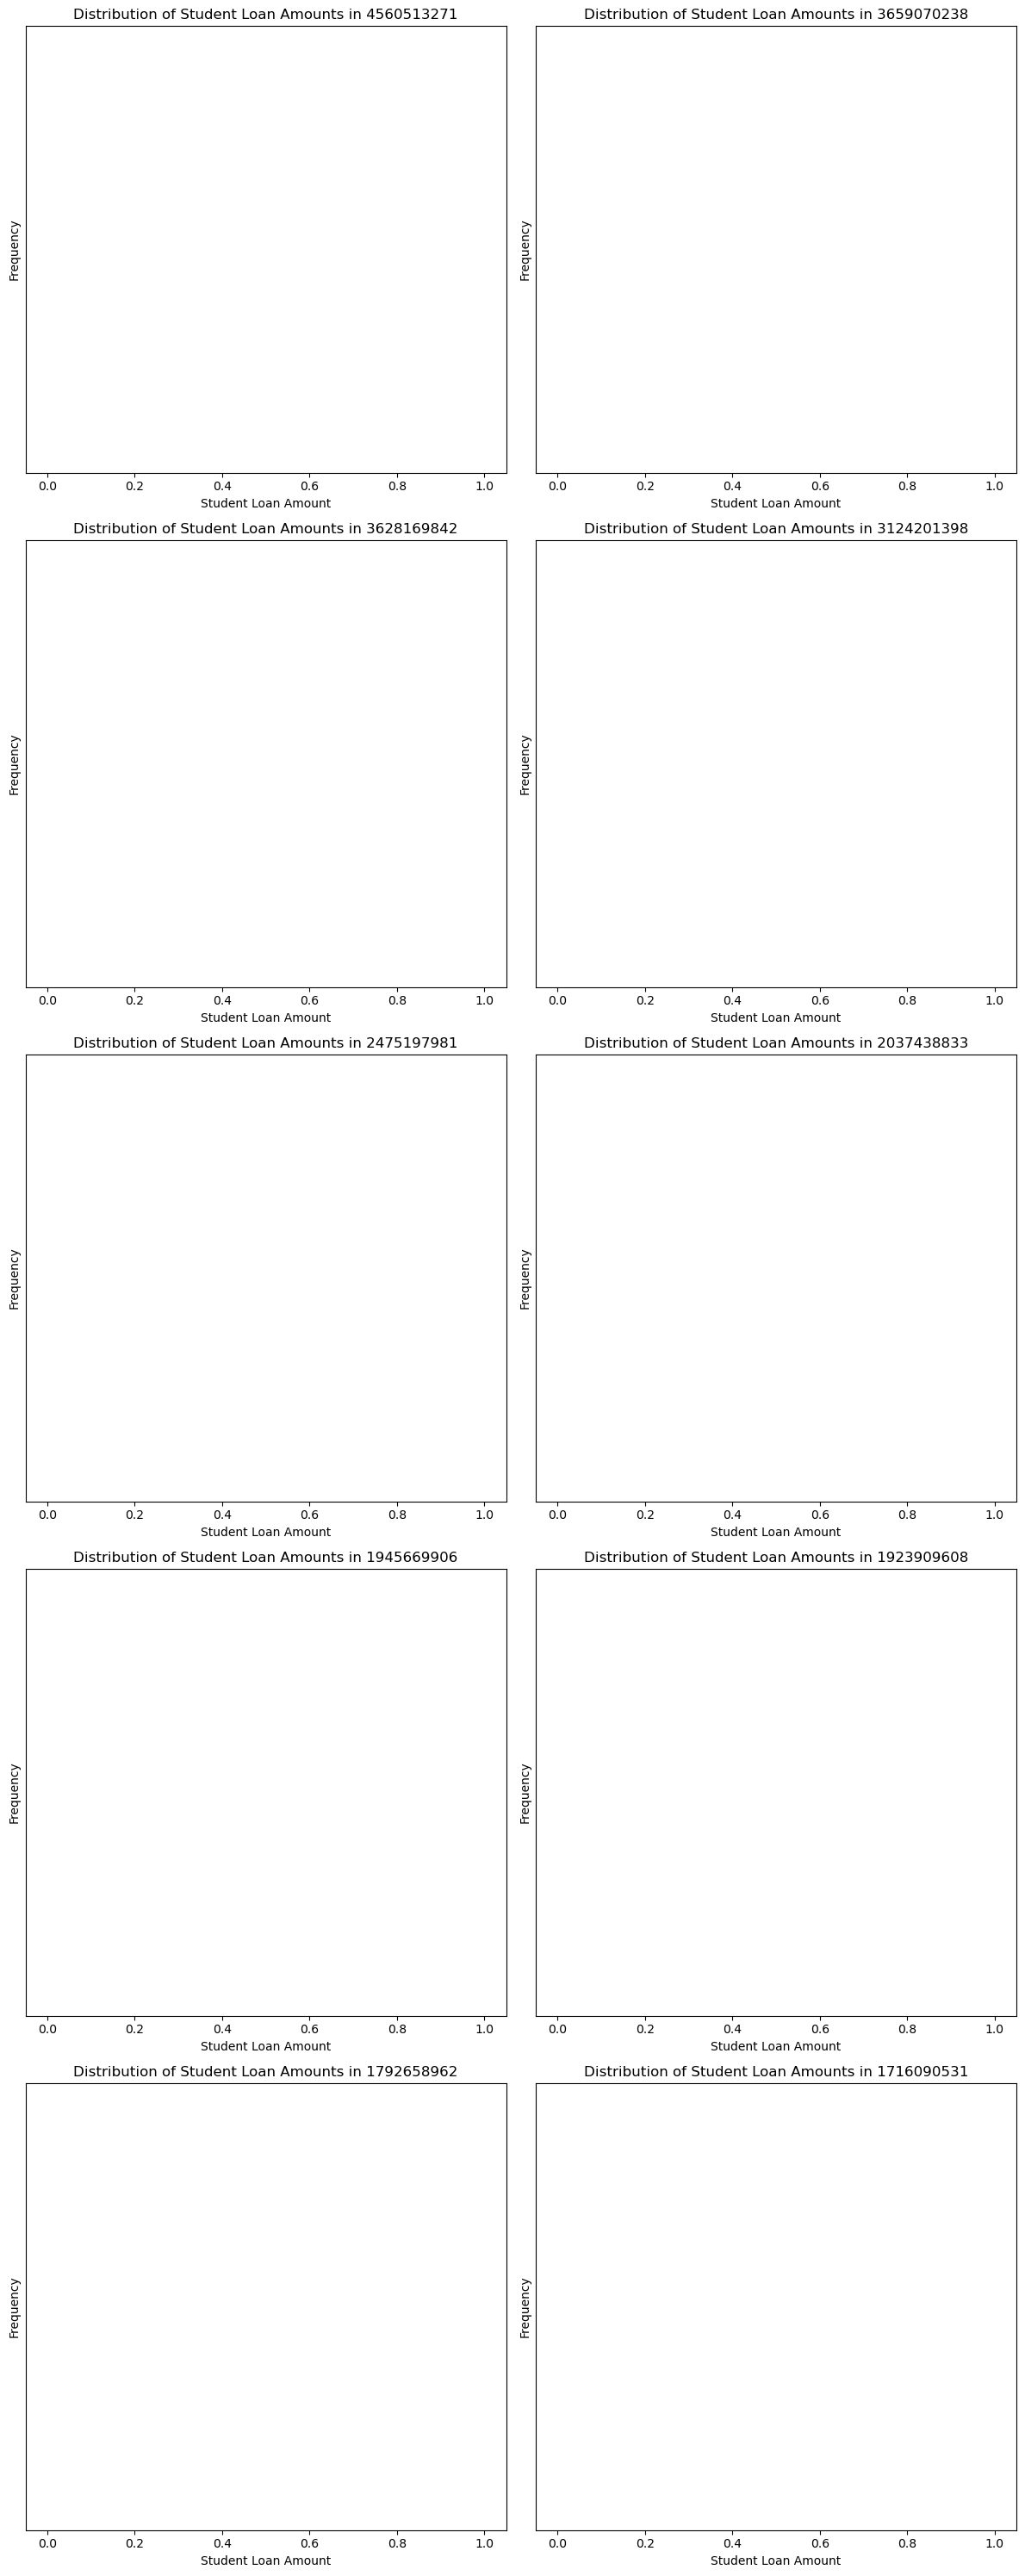

In [15]:
# box plot and histogram of student loan amounts by state -- not working
num_plots = len(top_10_states)
num_rows = (num_plots + 1) // 2
fig, axs = plt.subplots(num_rows, 2, figsize=(12, num_rows * 6))

for i, state in enumerate(top_10_states):
    row = i // 2
    col = i % 2
    
    state_data = df[df['State'] == state]['$ of Loans Originated']
    
    axs[row, col].hist(state_data, bins=20, color='blue', alpha=0.7)
    axs[row, col].set_title(f'Distribution of Student Loan Amounts in {state}')
    axs[row, col].set_xlabel('Student Loan Amount')
    axs[row, col].set_ylabel('Frequency')
    
    axs[row, col].boxplot(state_data, vert=False, positions=[state_data.median()])
    
    plt.tight_layout()

# plt.show()

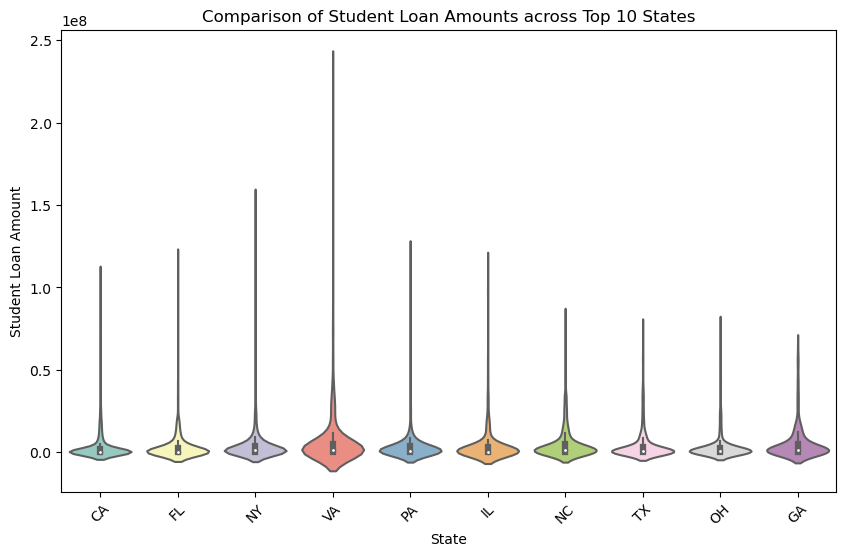

In [16]:
import seaborn as sns

# Create a violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='State', y='$ of Loans Originated', data=top_10_states_df, palette='Set3', scale='width')
plt.title('Comparison of Student Loan Amounts across Top 10 States')
plt.xlabel('State')
plt.ylabel('Student Loan Amount')
plt.xticks(rotation=45)

plt.show()

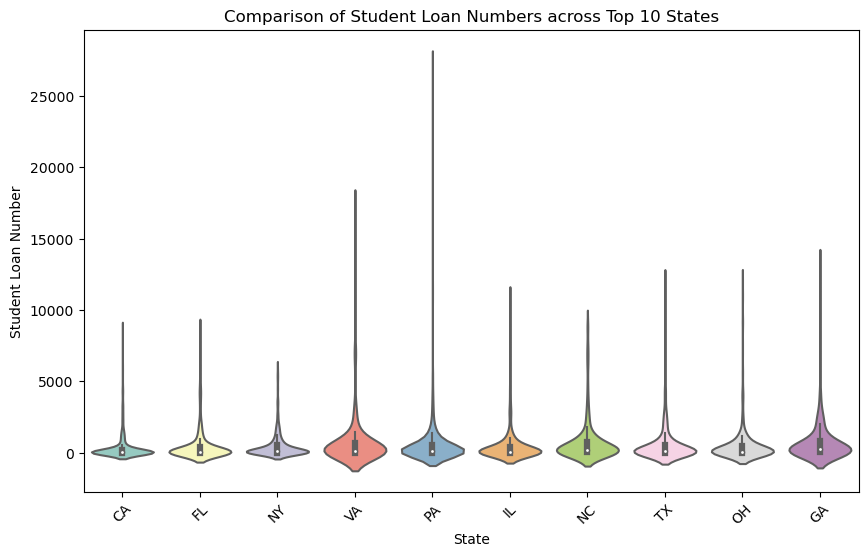

In [17]:
# Create a violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='State', y='# of Loans Originated', data=top_10_states_df_num, palette='Set3', scale='width')
plt.title('Comparison of Student Loan Numbers across Top 10 States')
plt.xlabel('State')
plt.ylabel('Student Loan Number')
plt.xticks(rotation=45)

plt.show()

In [18]:
# Levene's test for homogeneity of variance
from scipy.stats import levene

# Create list of dataframes for top 3 states
top_states = ['CA', 'TX', 'NY']
loan_data = [top_10_states_df[top_10_states_df['State'] == state]['$ of Loans Originated'] for state in top_states]

# Levene's test
statistic, p_value = levene(loan_data[0], loan_data[1], loan_data[2])

# Print the results
print("Levene's Test:")
print("Test Statistic:", statistic)
print("P-value:", p_value)

# Check the assumption
alpha = 0.05
if p_value < alpha:
    print("The variances are not homogeneous (reject null hypothesis)")
else:
    print("The variances are homogeneous (fail to reject null hypothesis)")

Levene's Test:
Test Statistic: 2.0772592019014406
P-value: 0.12545378024166495
The variances are homogeneous (fail to reject null hypothesis)


In [19]:
# Levene's test for homogeneity of variance
from scipy.stats import levene

# Create list of dataframes for top 3 states
top_states_num = ['TX', 'CA', 'PA']
loan_data_num = [top_10_states_df_num[top_10_states_df_num['State'] == state]['# of Loans Originated'] for state in top_states_num]

# Levene's test
statistic_num, p_value_num = levene(loan_data_num[0], loan_data_num[1], loan_data_num[2])

# Print the results
print("Levene's Test:")
print("Test Statistic:", statistic_num)
print("P-value:", p_value_num)

# Check the assumption
alpha = 0.05
if p_value_num < alpha:
    print("The variances are not homogeneous (reject null hypothesis)")
else:
    print("The variances are homogeneous (fail to reject null hypothesis)")

Levene's Test:
Test Statistic: 11.941128350347508
P-value: 6.843618652908872e-06
The variances are not homogeneous (reject null hypothesis)


In [20]:
# One-way ANOVA analysis for top 3 states
from scipy.stats import f_oneway

# Perform one-way ANOVA
statistic, p_value = f_oneway(*loan_data)

# Print the results
print("One-way ANOVA:")
print("Test Statistic:", statistic)
print("P-value:", p_value)

# Check the significance
alpha = 0.05
margin = 0.08
if p_value < alpha:
    print("There are significant differences between at least two groups (reject null hypothesis)")
elif p_value < margin and p_value >= alpha:
    print("There are marginal significant differences among three groups")
else:
    print("There are no significant differences between the groups (fail to reject null hypothesis)")

One-way ANOVA:
Test Statistic: 2.6160174369286455
P-value: 0.07326062025766786
There are marginal significant differences among three groups


In [21]:
# Welch's ANOVA: no homogeneous variance
statistic_num, p_value_num = f_oneway(*loan_data_num)

# Print the results
print("Welch's ANOVA:")
print("Test Statistic:", statistic_num)
print("P-value:", p_value_num)

# Check the significance
alpha = 0.05
if p_value_num < alpha:
    print("There are significant differences between at least two groups (reject null hypothesis)")
else:
    print("There are no significant differences between the groups (fail to reject null hypothesis)")

Welch's ANOVA:
Test Statistic: 12.681758147841181
P-value: 3.283554661513545e-06
There are significant differences between at least two groups (reject null hypothesis)


Tukey-Kramer Test - Pairwise Comparisons:
       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
group1 group2   meandiff  p-adj     lower        upper     reject
-----------------------------------------------------------------
    CA     NY 723703.2516  0.208 -278679.9912 1726086.4944  False
    CA     TX 897910.7742 0.0941 -114227.4146  1910048.963  False
    NY     TX 174207.5226  0.928 -935192.8349 1283607.8801  False
-----------------------------------------------------------------


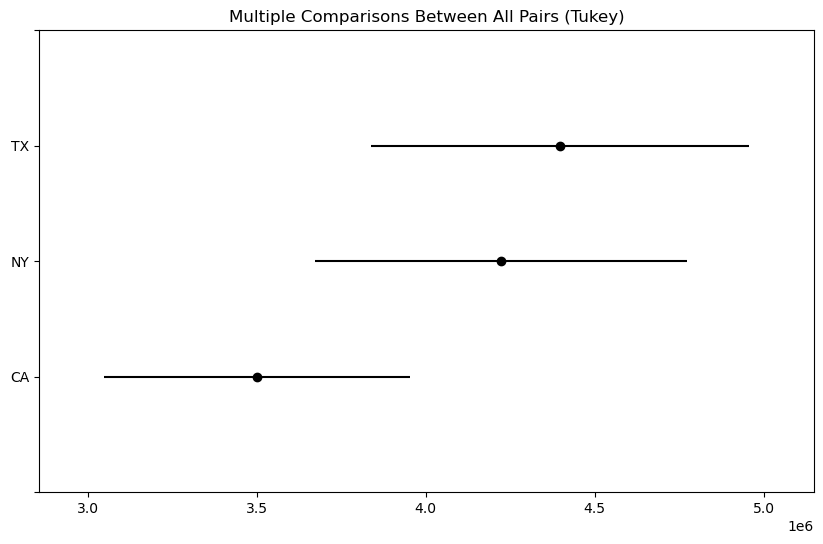

In [22]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Tukey-Kramer test for pairwise comparisons
tukey_result = pairwise_tukeyhsd(np.concatenate(loan_data), np.repeat(top_states, [len(d) for d in loan_data]))
print("Tukey-Kramer Test - Pairwise Comparisons:")
print(tukey_result)

# Plot the results
tukey_result.plot_simultaneous()
plt.show()


In [23]:
# GamesHowell's Test - Pairwise Comparisons
from pingouin import pairwise_gameshowell

# Create a DataFrame
gh_df = pd.DataFrame({'Values': np.concatenate(loan_data_num), 'Groups': np.repeat(top_states_num, [len(d) for d in loan_data_num])})

# Perform Games-Howell test for pairwise comparisons
gameshowell_result = pairwise_gameshowell(data=gh_df, dv='Values', between='Groups')

# Print the results
print("Games-Howell Test - Pairwise Comparisons:")
print(gameshowell_result)



ModuleNotFoundError: No module named 'pingouin'

Geographic, How does the average student loan vary by zip code?M

Geographic, Are there trends based on geographic region or type of school?T

Loan Type, What is the breakdown of type of student loan  (subsidized, unsubsidized, grad plus, parent plus, etc.)?M

School Type, What is the breakdown of student loan quantity/$ by school type (for profit, non-profit, public, etc.)?L

In [ ]:
import statsmodels.api as sm

# Create a copy of your original DataFrame
mlm_df = df.copy()
#mlm_df['School_Type'] = mlm_df['School_Type'].astype(float) # Convert the column to float
#mlm_df['Loan_Type'] = mlm_df['Loan_Type'].astype(float)
#mlm_df['State'] = mlm_df['State'].astype(float)
mlm_df['$ of Loans Originated'] = mlm_df['$ of Loans Originated'].astype(float)

# Convert categorical variables into dummy variables
categorical_vars = ['School Type', 'Loan Type', 'State']
# Set the drop_first=True argument to avoid multicollinearity.
mlm_df = pd.get_dummies(mlm_df, columns=categorical_vars, drop_first=True) 

# Intercept always is 1 when importing each dummy variable
mlm_df['intercept'] = 1

# Define dependent variable
# dependent_var = '$ of Loans Originated'
dependent_var = mlm_df['$ of Loans Originated']

# Define independent variables (including the intercept)
irrelevant_vars = ['index','OPE ID','School','City','Zip Code','Recipients', '# of Loans Originated', '$ of Loans Originated', '# of Disbursements','$ of Disbursements',]
mlm_df_ind = mlm_df.drop(irrelevant_vars, axis=1)

independent_vars = mlm_df_ind.columns.tolist()

# Create a model
X = mlm_df[independent_vars].values
# y = mlm_df[dependent_var].values
y = dependent_var.values
model = sm.OLS(y, X)

# Fit the model
results = model.fit()

# Print the regression summary
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     27.87
Date:                Wed, 16 Aug 2023   Prob (F-statistic):          8.00e-286
Time:                        20:48:51   Log-Likelihood:            -2.3258e+05
No. Observations:               13283   AIC:                         4.653e+05
Df Residuals:                   13223   BIC:                         4.657e+05
Df Model:                          59                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -2.114e+06   2.29e+05     -9.241      0.0

In [ ]:
# add interaction terms to the model
interaction_vars = ['School Type_Proprietary', 'Loan Type_Subsidized', 'State_NY']
for var1 in interaction_vars:
    for var2 in interaction_vars:
        if var1 != var2:
            interaction_name = f'{var1}_x_{var2}'
            mlm_df[interaction_name] = mlm_df[var1] * mlm_df[var2]

# update independent_vars
independent_vars += interaction_vars

# new X matrix
X = mlm_df[independent_vars].values

# fit the possible interaction to model
model = sm.OLS(y, X)
results = model.fit()

print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     27.86
Date:                Wed, 16 Aug 2023   Prob (F-statistic):          9.30e-286
Time:                        20:51:35   Log-Likelihood:            -2.3258e+05
No. Observations:               13283   AIC:                         4.653e+05
Df Residuals:                   13223   BIC:                         4.657e+05
Df Model:                          59                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -9.312e+17   4.39e+18     -0.212      0.8

In [ ]:
# add interaction terms to the model
interaction_vars = ['School Type_Proprietary', 'Loan Type_Subsidized']
for var1 in interaction_vars:
    for var2 in interaction_vars:
        if var1 != var2:
            interaction_name = f'{var1}_x_{var2}'
            mlm_df[interaction_name] = mlm_df[var1] * mlm_df[var2]

# update independent_vars
independent_vars += interaction_vars

# new X matrix
X = mlm_df[independent_vars].values

# fit the possible interaction to model
model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                     27.68
Date:                Wed, 16 Aug 2023   Prob (F-statistic):          1.08e-283
Time:                        20:52:23   Log-Likelihood:            -2.3258e+05
No. Observations:               13283   AIC:                         4.653e+05
Df Residuals:                   13223   BIC:                         4.657e+05
Df Model:                          59                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          5.797e+18   2.12e+18      2.734      0.0

In [ ]:
import statsmodels.api as sm

# Create a copy of your original DataFrame
mlm_df = df.copy()
#mlm_df['School_Type'] = mlm_df['School_Type'].astype(float) # Convert the column to float
#mlm_df['Loan_Type'] = mlm_df['Loan_Type'].astype(float)
#mlm_df['State'] = mlm_df['State'].astype(float)
mlm_df['$ of Loans Originated'] = mlm_df['$ of Loans Originated'].astype(float)

# Convert categorical variables into dummy variables
categorical_vars = ['School Type', 'Loan Type', 'State']
# Set the drop_first=True argument to avoid multicollinearity.
mlm_df = pd.get_dummies(mlm_df, columns=categorical_vars, drop_first=True) 

# Intercept always is 1 when importing each dummy variable
mlm_df['intercept'] = 1

# Define dependent variable
# dependent_var = '$ of Loans Originated'
dependent_var = mlm_df['$ of Loans Originated']

# Define independent variables (including the intercept)
irrelevant_vars = ['index','OPE ID','School','City','Zip Code','Recipients', '# of Loans Originated', '$ of Loans Originated', '# of Disbursements','$ of Disbursements',]
mlm_df_ind = mlm_df.drop(irrelevant_vars, axis=1)

independent_vars = mlm_df_ind.columns.tolist()
independent_vars


['School Type_Proprietary',
 'School Type_Public',
 'Loan Type_Parent Plus',
 'Loan Type_Subsidized',
 'Loan Type_Unsubsidized - Graduate',
 'Loan Type_Unsubsidized - Undergraduate',
 'State_AL',
 'State_AR',
 'State_AZ',
 'State_CA',
 'State_CO',
 'State_CT',
 'State_DC',
 'State_DE',
 'State_FL',
 'State_GA',
 'State_GU',
 'State_HI',
 'State_IA',
 'State_ID',
 'State_IL',
 'State_IN',
 'State_KS',
 'State_KY',
 'State_LA',
 'State_MA',
 'State_MD',
 'State_ME',
 'State_MI',
 'State_MN',
 'State_MO',
 'State_MS',
 'State_MT',
 'State_NC',
 'State_ND',
 'State_NE',
 'State_NH',
 'State_NJ',
 'State_NM',
 'State_NV',
 'State_NY',
 'State_OH',
 'State_OK',
 'State_OR',
 'State_PA',
 'State_PR',
 'State_RI',
 'State_SC',
 'State_SD',
 'State_TN',
 'State_TX',
 'State_UT',
 'State_VA',
 'State_VI',
 'State_VT',
 'State_WA',
 'State_WI',
 'State_WV',
 'State_WY',
 'intercept']

<!-- VS, What is the breakdown in disbursements versus loan origination $ amounts? -->

<!-- VS, Which schools have the highest disparity between loans originated and loans disbursed? -->

API, Foreign university, VS US

More datasets